
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [3]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
# check for missing values
print(f'Missing Entries: {np.sum(pd.isna(df))}')

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56
Missing Entries: 0    0
1    0
2    0
3    0
4    0
dtype: int64


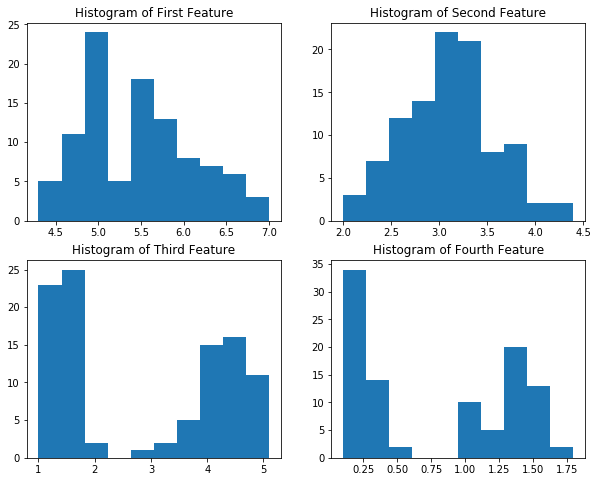

In [4]:
fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

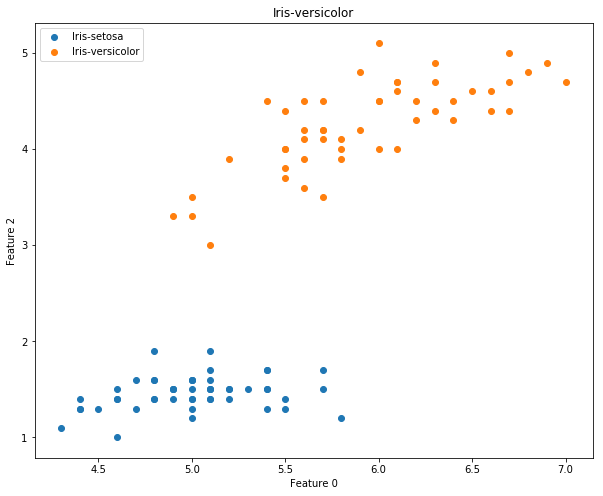

In [5]:
plt.figure(figsize=(10,8))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the output layer.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [127]:
class NN:
    #weights2 = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(2, 1))
    
    
    def __init__(self, learning_rate, epochs, regularization, regularizationTerm=None):
        self.learning_rate = learning_rate
        self.regularization = regularization
        if regularization:
            self.lamReg = regularizationTerm
        self.maxEpochs = epochs
        self.errors = []
        # weight initialization is in range -4*sqrt(6/numNeuronsInLayer) and +4*sqrt(6/numNeuronsInLayer)
        self.weights = np.random.uniform(-4*np.sqrt(6.0/4), 4*np.sqrt(6.0/4), size=(3, 1))

    def forwardPass(self, x):
        if len(x.shape) == 1:
            x = x.reshape(-1, 1).T
        
        # adding bias
        self.inp = np.hstack((np.ones((len(x), 1)), x))
        self.z = np.dot(self.inp, self.weights)
        self.prediction = sigmoid(self.z)
        return self.prediction
    
    
    def train(self,data):
        samples = data[:, :2]
        targets = data[:, 2]
        
        epochs = 0
        converged = False        
        while not converged:
            epochs += 1
            totalError = 0.0
            samples = np.random.permutation(samples)
            updateWeights = np.zeros((3, 1))
            for i, sample in enumerate(samples):
                sample = np.expand_dims(sample, axis=0)
                pred = self.forwardPass(sample)
                
                regTerm = self.lamReg/2 *np.sum(self.weights**2) if self.regularization else 0
                gradient = self.lossFunction(pred, targets[i], derived=True) * self.inp.T + regTerm
                self.weights -= self.learning_rate * -gradient
                
                totalError += np.abs(self.logLossFunction(pred, targets[i]))
            
            self.errors.append(totalError)
            if epochs%100 == 0:
                print(f'Error in epoch {epochs}: {totalError}')
            if self.maxEpochs != 0:
                if epochs >= self.maxEpochs:
                    break
            if np.abs(totalError) < 0.005:
                converged = True
        print(f'Converged after {epochs} epochs.')
        
    def lossFunction(self, pred, target, derived=False):
        if not derived:
            return 0.5*(target-pred)**2
        else:
            return (target-pred)
        
    
    def logLossFunction(self, pred, target, derived=False):
        if not derived:
                return -target*np.log(pred)-(1-target)*np.log(1-pred)
        else:
            return -(target-pred)



In [144]:
def trainNN(samples, features, learning_rate, epochs, regularization, regularizationTerm=None):
    # Putting these in vector shapes
    nn = NN(learning_rate, epochs, regularization, regularizationTerm)
    # only use features 0 and 2
    data = np.delete(samples, features, axis=1)
    data = np.random.permutation(data)
    data_train = data[:int(0.8*len(data))]
    # print(data_train)
    data_test = data[int(0.8*len(data)):]
    nn.train(data_train)

    # print(data_test)
    # test
    test_error = np.mean(np.abs(data_test[:, 2] - nn.forwardPass(data_test[:, :2]))**2)

    test_error = test_error/len(data_test)
    print(f'Test Error: {test_error}')

    # Somehow he only learns to predict 0.5
    # Something is off...
    n=10
    print(f'Target: {data[n, 2]} prediction: {nn.forwardPass(data[n, :2])}')
    print(f'Weights: {nn.weights}')
    return nn

In [145]:
nn = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=True, regularizationTerm=0.001)

Error in epoch 100: [[54.80698046]]
Error in epoch 200: [[56.29279501]]
Error in epoch 300: [[55.32297434]]
Error in epoch 400: [[55.43292278]]
Error in epoch 500: [[55.94935104]]
Error in epoch 600: [[55.28555253]]
Error in epoch 700: [[55.65296799]]
Error in epoch 800: [[55.4695402]]
Error in epoch 900: [[55.76278845]]
Error in epoch 1000: [[55.63876462]]
Converged after 1000 epochs.
Test Error: 0.012598628711140595
Target: 0.0 prediction: [[0.51671778]]
Weights: [[ 0.04632008]
 [ 0.11059499]
 [-0.05532807]]


In [146]:
nn2 = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=False)


Error in epoch 100: [[56.63928579]]
Error in epoch 200: [[56.22026768]]
Error in epoch 300: [[56.51614265]]
Error in epoch 400: [[54.5970899]]
Error in epoch 500: [[55.02425757]]
Error in epoch 600: [[55.77148867]]
Error in epoch 700: [[55.52613525]]
Error in epoch 800: [[55.37550881]]
Error in epoch 900: [[55.60635054]]
Error in epoch 1000: [[55.85591005]]
Converged after 1000 epochs.
Test Error: 0.012620452419645115
Target: 0.0 prediction: [[0.47140651]]
Weights: [[-0.09323299]
 [-0.19012262]
 [ 0.20539085]]


[[ 0.04632008]
 [ 0.11059499]
 [-0.05532807]]
[[-0.09323299]
 [-0.19012262]
 [ 0.20539085]]


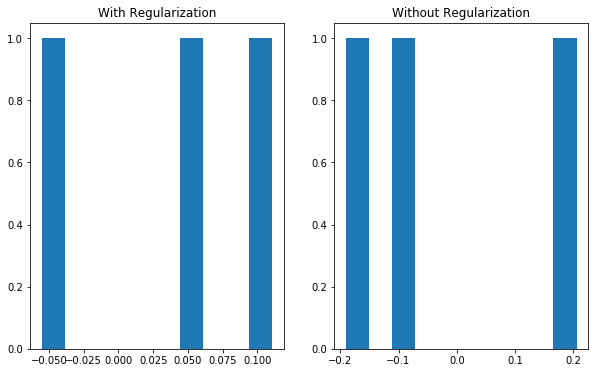

In [147]:
# look at weights --> are they huge?
# what if regularization is used?
print(nn.weights)
print(nn2.weights)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title("With Regularization")
plt.hist(nn.weights)
plt.subplot(122)
plt.title("Without Regularization")
plt.hist(nn2.weights)
plt.show()

In [149]:
lrates = [0.0001, 0.001, 0.01, 0.1, 1]
for lr in lrates:
    print(f'Learning rate: {lr}')
    trainNN(samples, [1, 3], learning_rate = lr, epochs=1000, regularization=True, regularizationTerm=0.001)


Learning rate: 0.0001
Error in epoch 100: [[62.68302824]]
Error in epoch 200: [[64.96641773]]
Error in epoch 300: [[65.01981648]]
Error in epoch 400: [[67.7888969]]
Error in epoch 500: [[59.4028101]]
Error in epoch 600: [[63.6544887]]
Error in epoch 700: [[66.91242807]]
Error in epoch 800: [[69.79375755]]
Error in epoch 900: [[57.20258123]]
Error in epoch 1000: [[66.25767171]]
Converged after 1000 epochs.
Test Error: 0.014247708137002279
Target: 0.0 prediction: [[0.27374285]]
Weights: [[-0.81484407]
 [-1.58111981]
 [ 3.00258596]]
Learning rate: 0.001
Error in epoch 100: [[57.00856086]]
Error in epoch 200: [[57.25095459]]
Error in epoch 300: [[54.96008923]]
Error in epoch 400: [[54.63790511]]
Error in epoch 500: [[54.80383631]]
Error in epoch 600: [[56.95904782]]
Error in epoch 700: [[55.45124446]]
Error in epoch 800: [[55.42273649]]
Error in epoch 900: [[55.92886443]]
Error in epoch 1000: [[55.46435366]]
Converged after 1000 epochs.
Test Error: 0.01254878972926288
Target: 0.0 predictio

## Part 2

In [ ]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)